<a href="https://colab.research.google.com/github/MpRonald/Machine-Learning/blob/main/AI_Increased.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle as pk
from yellowbrick.regressor import prediction_error, residuals_plot
from yellowbrick.model_selection import FeatureImportances
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import (train_test_split, cross_validate,
    cross_val_score, KFold, GridSearchCV)
from sklearn.dummy import DummyRegressor
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/MpRonald/datasets/main/flights.csv')
df

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271
...,...,...,...,...,...,...,...,...,...,...,...
71170,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,364,2022,True,25.677277
71171,17,BZ,Airbus A330,non-schengen,CNU,16.718722,21.718722,364,2022,True,52.624348
71172,7,MM,Boeing 787,schengen,TZF,8.564949,13.564949,364,2022,True,56.167080
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844


In [3]:
df.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [4]:
df.describe(include='O')

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


In [5]:
df.airline.value_counts(normalize=True)*100

BZ    66.874605
YE    19.862311
MM    13.263084
Name: airline, dtype: float64

In [6]:
df.origin.value_counts(normalize=True)*100

TZF    19.897436
TCY    16.717949
ZQO    16.498771
FJB    10.124341
CNU     6.801545
EMM     6.713031
MWL     6.710221
AUZ     6.627327
CSF     6.566913
PUA     3.342466
Name: origin, dtype: float64

In [7]:
df.is_holiday.value_counts(normalize=True)*100

False    94.520548
True      5.479452
Name: is_holiday, dtype: float64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [9]:
df.isnull().sum()

flight_id         0
airline           0
aircraft_type     0
schengen          0
origin            0
arrival_time      0
departure_time    0
day               0
year              0
is_holiday        0
delay             0
dtype: int64

In [10]:
df.duplicated().sum()

0

## Plots

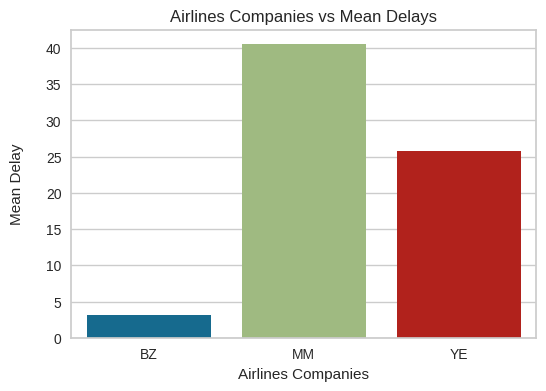

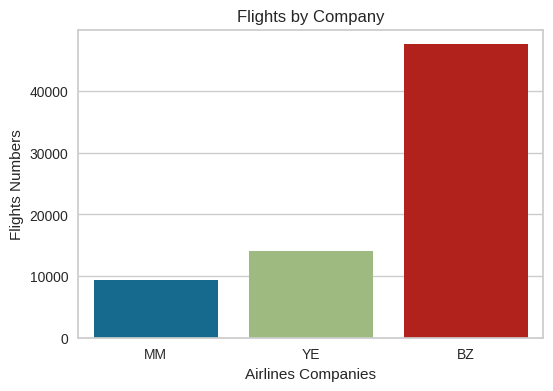

In [11]:
plt.figure(figsize=(6, 4))

avg_delay = df.groupby('airline')['delay'].mean().reset_index()
sns.barplot(x='airline', y='delay', data=avg_delay)

plt.title('Airlines Companies vs Mean Delays')
plt.xlabel('Airlines Companies')
plt.ylabel('Mean Delay\n')
plt.show()
print()
plt.figure(figsize=(6, 4))

sns.countplot(data=df, x='airline')

plt.title('Flights by Company')
plt.xlabel('Airlines Companies')
plt.ylabel('Flights Numbers')
plt.show()


## Creating new columns

In [12]:
df['date'] = pd.to_datetime(df.year.astype(str) + '-' + (df.day + 1).astype(str), format='%Y-%j')
df

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
71170,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,364,2022,True,25.677277,2022-12-31
71171,17,BZ,Airbus A330,non-schengen,CNU,16.718722,21.718722,364,2022,True,52.624348,2022-12-31
71172,7,MM,Boeing 787,schengen,TZF,8.564949,13.564949,364,2022,True,56.167080,2022-12-31
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844,2022-12-31


In [13]:
df['is_weekend'] = df.date.dt.weekday.isin([5,6])
df

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01,False
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01,False
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01,False
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01,False
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71170,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,364,2022,True,25.677277,2022-12-31,True
71171,17,BZ,Airbus A330,non-schengen,CNU,16.718722,21.718722,364,2022,True,52.624348,2022-12-31,True
71172,7,MM,Boeing 787,schengen,TZF,8.564949,13.564949,364,2022,True,56.167080,2022-12-31,True
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844,2022-12-31,True


In [14]:
df['day_name'] = df.date.dt.day_name()
df

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01,False,Friday
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01,False,Friday
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01,False,Friday
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01,False,Friday
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01,False,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71170,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,364,2022,True,25.677277,2022-12-31,True,Saturday
71171,17,BZ,Airbus A330,non-schengen,CNU,16.718722,21.718722,364,2022,True,52.624348,2022-12-31,True,Saturday
71172,7,MM,Boeing 787,schengen,TZF,8.564949,13.564949,364,2022,True,56.167080,2022-12-31,True,Saturday
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844,2022-12-31,True,Saturday


In [15]:
df.schengen = df.schengen.replace({'non-schengen':0, 'schengen':1})
df.is_holiday = df.is_holiday.replace({False:0, True:1})
df.is_weekend = df.is_weekend.replace({False:0, True:1})
df

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
0,26,MM,Airbus A320,0,TCY,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,Friday
1,10,YE,Airbus A320,0,TCY,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,Friday
2,3,BZ,Embraer E175,1,TZF,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,Friday
3,28,BZ,Airbus A330,0,EMM,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,Friday
4,15,BZ,Airbus A330,0,FJB,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71170,3,BZ,Embraer E175,1,TZF,18.635384,22.635384,364,2022,1,25.677277,2022-12-31,1,Saturday
71171,17,BZ,Airbus A330,0,CNU,16.718722,21.718722,364,2022,1,52.624348,2022-12-31,1,Saturday
71172,7,MM,Boeing 787,1,TZF,8.564949,13.564949,364,2022,1,56.167080,2022-12-31,1,Saturday
71173,5,BZ,Airbus A320,1,ZQO,9.344097,12.344097,364,2022,1,56.758844,2022-12-31,1,Saturday


## Checking categorical columns

In [16]:
categorical_columns = df.select_dtypes(include='object').columns.tolist()
categorical_columns

['airline', 'aircraft_type', 'origin', 'day_name']

## Encoding

In [17]:
df_encoded = pd.get_dummies(data=df, columns=categorical_columns, dtype=int)
df_encoded

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
1,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
2,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,...,0,1,0,1,0,0,0,0,0,0
3,28,0,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0
4,15,0,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71170,3,1,18.635384,22.635384,364,2022,1,25.677277,2022-12-31,1,...,0,1,0,0,0,1,0,0,0,0
71171,17,0,16.718722,21.718722,364,2022,1,52.624348,2022-12-31,1,...,0,0,0,0,0,1,0,0,0,0
71172,7,1,8.564949,13.564949,364,2022,1,56.167080,2022-12-31,1,...,0,1,0,0,0,1,0,0,0,0
71173,5,1,9.344097,12.344097,364,2022,1,56.758844,2022-12-31,1,...,0,0,1,0,0,1,0,0,0,0


## Checking correlations

<ipython-input-18-8be37e7d501b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


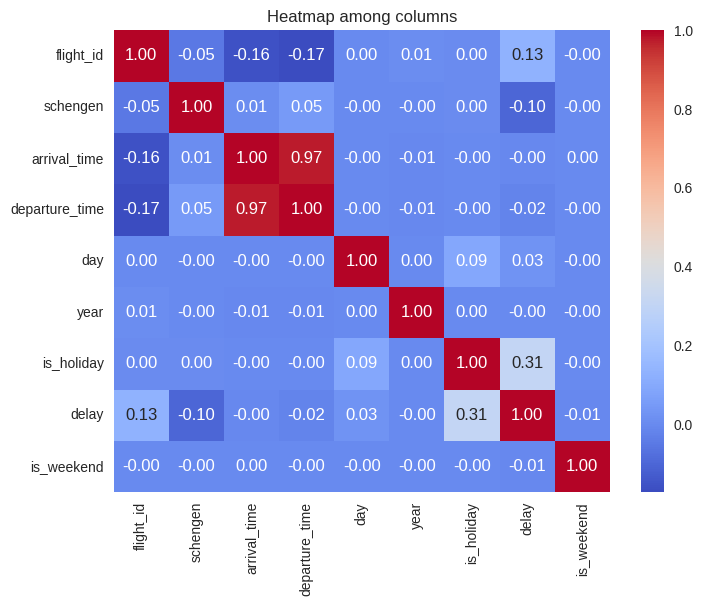

In [18]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap among columns');

## Remove some columns

In [19]:
df_cleaned = df_encoded.drop(['flight_id', 'departure_time', 'day', 'year', 'date'], axis=1)
df_cleaned

,schengen,arrival_time,is_holiday,delay,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,0,8.885071,0,70.205981,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,0
1,0,8.939996,0,38.484609,0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,0
2,1,18.635384,0,2.388305,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,0,15.967963,0,19.138491,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,16.571894,0,15.016271,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71170,1,18.635384,1,25.677277,1,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
71171,0,16.718722,1,52.624348,1,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
71172,1,8.564949,1,56.167080,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
71173,1,9.344097,1,56.758844,1,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0


## Creating model

In [20]:
X = df_cleaned.drop(['delay'], axis=1)
y = df_cleaned['delay']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [22]:
dummy = DummyRegressor().fit(X_train, y_train)

In [23]:
y_pred_dummy = dummy.predict(X_test)

In [79]:
def metrics_regression(y_test, y_pred) -> list:
    mse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    metrics = {
    "Erro Quadrático Médio (MSE)": round(mse,2),
    "Erro Absoluto Médio (MAE)": round(mae,2),
    "R²": round(r2,2)}

    return metrics

In [80]:
metrics_regression(y_test, y_pred_dummy)

{'Erro Quadrático Médio (MSE)': 23.27,
 'Erro Absoluto Médio (MAE)': 18.71,
 'R²': -0.0}

In [74]:
rf = RandomForestRegressor(max_depth=30, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
metrics_regression(y_test, y_pred_rf)

['R²: 0.67',
 'Erro Absoluto Médio (MAE): 10.64',
 'Erro Quadrático Médio (MSE): 13.31']

## Plot predictions

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


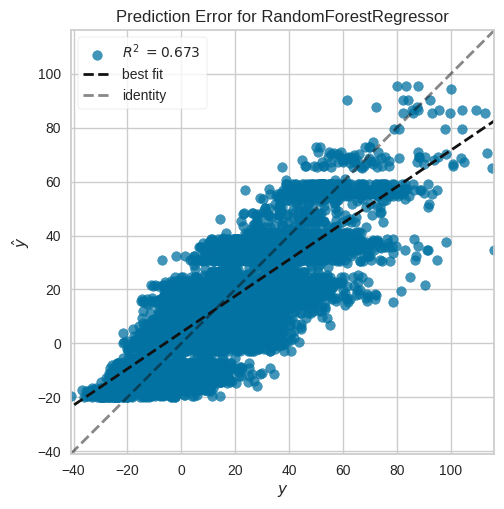

In [27]:
viz = prediction_error(rf, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


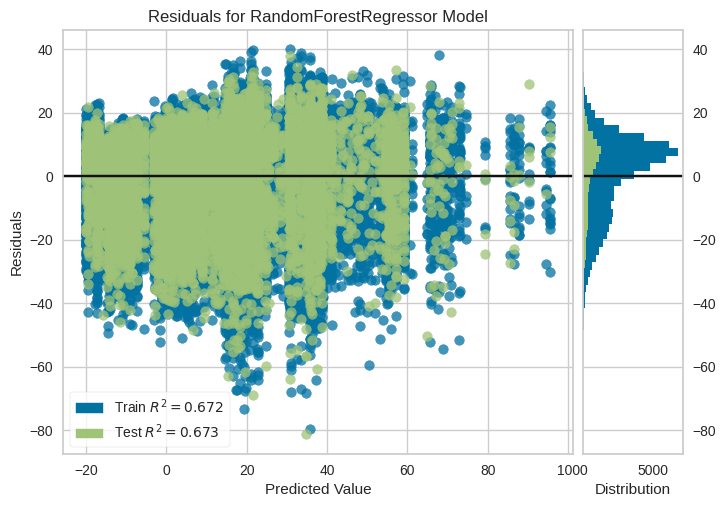

In [28]:
viz = residuals_plot(rf, X_train, y_train, X_test, y_test)

## Scores metrics

In [34]:
scores = cross_val_score(rf, X_train, y_train, cv=3)

print("Accuracy for each fold:", scores)
print(f"Mean accuracy: {scores.mean():.2f}")

Accuracy for each fold: [0.67008004 0.66313416 0.66456375]
Mean accuracy: 0.67


In [41]:
scoring = {'mae':'neg_mean_absolute_error',
           'rmse':'neg_root_mean_squared_error',
           'r2':'r2'}
cv_kfold = KFold(n_splits=10, shuffle=True, random_state=42)
cv_results = cross_validate(rf, X_train, y_train, cv=cv_kfold, scoring=scoring)

In [44]:
results_df = pd.DataFrame({
    'MAE': cv_results['test_mae'],
    'RMSE': cv_results['test_rmse'],
    'R2': cv_results['test_r2']
})

results_df

,MAE,RMSE,R2
0,-10.755385,-13.403315,0.670723
1,-10.639351,-13.314807,0.663627
2,-10.855117,-13.465484,0.670805
3,-10.670122,-13.235707,0.667373
4,-10.754347,-13.320249,0.666534
5,-10.769635,-13.358734,0.675932
6,-10.765552,-13.371810,0.658249
7,-10.542984,-13.157160,0.672520
8,-10.626494,-13.304579,0.657307
9,-10.747972,-13.438721,0.661797


## Features importances

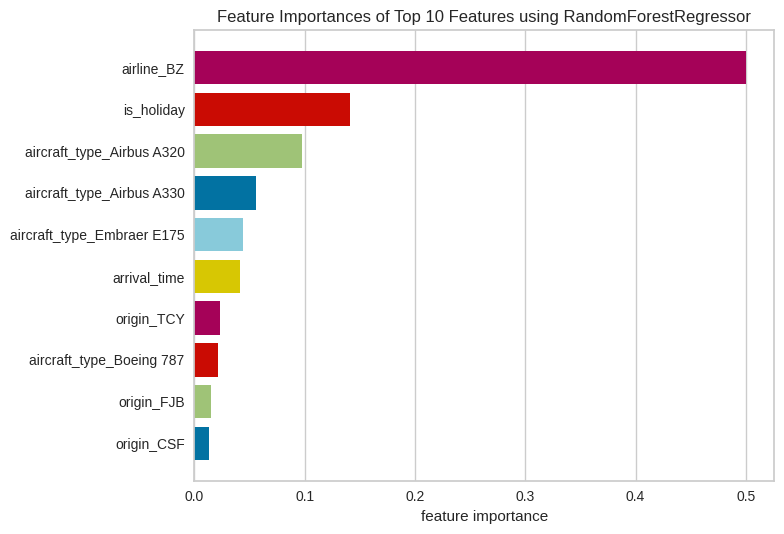

In [53]:
viz = FeatureImportances(rf, relative=False, topn=10).fit(X_train, y_train)
viz.show();

In [59]:
importances = rf.feature_importances_*100
features_importances = pd.DataFrame({'feature':X.columns, 'importances':importances})
features_importances.sort_values('importances', ascending=False)

,feature,importances
4,airline_BZ,50.046155
2,is_holiday,14.082015
7,aircraft_type_Airbus A320,9.718316
8,aircraft_type_Airbus A330,5.627057
12,aircraft_type_Embraer E175,4.375245
1,arrival_time,4.171265
20,origin_TCY,2.365149
11,aircraft_type_Boeing 787,2.155797
17,origin_FJB,1.506776
15,origin_CSF,1.365109


In [82]:
results_df_feat = pd.DataFrame(index=['rmse','mae','r2'])
rf_features = RandomForestRegressor(random_state=42, max_depth=30)
for count in range(2,31):
    selected_features = features_importances['feature'].values[:count]
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]
    rf_features.fit(X_train_selected, y_train)
    y_pred_feat = rf_features.predict(X_test_selected)
    metrics = metrics_regression(y_test, y_pred_feat)
    results_df_feat[count] = list(metrics.values())

results_df_feat.T

,rmse,mae,r2
2,15.14,12.16,0.58
3,13.34,10.70,0.67
4,13.34,10.70,0.67
5,13.34,10.70,0.67
6,13.34,10.70,0.67
7,13.34,10.70,0.67
8,13.34,10.70,0.67
9,13.34,10.70,0.67
10,13.34,10.70,0.67
11,13.34,10.70,0.67


In [83]:
selected_features = features_importances['feature'].values[:10]
X_selected_feat = X[selected_features]
X_selected_feat

,schengen,arrival_time,is_holiday,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,aircraft_type_Boeing 737
0,0,8.885071,0,0,0,1,0,1,0,0
1,0,8.939996,0,0,0,0,1,1,0,0
2,1,18.635384,0,0,1,0,0,0,0,0
3,0,15.967963,0,0,1,0,0,0,1,0
4,0,16.571894,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
71170,1,18.635384,1,1,1,0,0,0,0,0
71171,0,16.718722,1,1,1,0,0,0,1,0
71172,1,8.564949,1,1,0,1,0,0,0,0
71173,1,9.344097,1,1,1,0,0,1,0,0


##Grid Search CV

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X_selected_feat, y, test_size=0.15, random_state=42)

In [94]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_grid, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best Params")
print(grid_search.best_params_)

Melhores hiperparâmetros:
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


In [97]:
y_pred_grid = grid_search.predict(X_test)
metrics_grid_search = metrics_regression(y_test, y_pred_grid)
metrics_grid_search

{'Erro Quadrático Médio (MSE)': 13.34,
 'Erro Absoluto Médio (MAE)': 10.7,
 'R²': 0.67}

In [100]:
metrics_grid = metrics_regression(y_test, y_pred_feat)
results_df_feat['grid_search'] = list(metrics.values())
results_df_feat.iloc[:,20:]

,22,23,24,25,26,27,28,29,30,grid_search
rmse,13.34,13.34,13.31,13.30,13.30,13.30,13.31,13.31,13.31,13.31
mae,10.70,10.70,10.67,10.65,10.64,10.64,10.64,10.64,10.64,10.64
r2,0.67,0.67,0.67,0.67,0.67,0.67,0.67,0.67,0.67,0.67


## Saving model

In [102]:
try:
    with open('prod_model_grid.pkl', 'wb') as file:
        pk.dump(grid_search.best_estimator_, file)
    print('Success, model saved')
except Exception as e:
    print(f'Fail: error {e}')

Success, model saved
